In [19]:
import pandas as pd 
import IPython.display as ipd
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [20]:
data = pd.read_csv("ESC-50-master/meta/esc50.csv") 

In [21]:
data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [22]:
data["category"]

0                    dog
1         chirping_birds
2         vacuum_cleaner
3         vacuum_cleaner
4           thunderstorm
5           thunderstorm
6        door_wood_knock
7            can_opening
8                   crow
9        door_wood_knock
10       door_wood_knock
11              clapping
12              clapping
13              clapping
14                   dog
15              clapping
16          thunderstorm
17             fireworks
18             fireworks
19             fireworks
20             fireworks
21              clapping
22              clapping
23              clapping
24              chainsaw
25              airplane
26           mouse_click
27         pouring_water
28                 train
29                 sheep
              ...       
1970         water_drops
1971      glass_breaking
1972      chirping_birds
1973                 cat
1974         water_drops
1975            laughing
1976    drinking_sipping
1977         can_opening
1978           breathing


In [23]:
dogs = data[data['category']=="dog"]
print(dogs)
len(dogs)

              filename  fold  target category  esc10  src_file take
0     1-100032-A-0.wav     1       0      dog   True    100032    A
14    1-110389-A-0.wav     1       0      dog   True    110389    A
157    1-30226-A-0.wav     1       0      dog   True     30226    A
158    1-30344-A-0.wav     1       0      dog   True     30344    A
170    1-32318-A-0.wav     1       0      dog   True     32318    A
296    1-59513-A-0.wav     1       0      dog   True     59513    A
375    1-85362-A-0.wav     1       0      dog   True     85362    A
392    1-97392-A-0.wav     1       0      dog   True     97392    A
478   2-114280-A-0.wav     2       0      dog   True    114280    A
479   2-114587-A-0.wav     2       0      dog   True    114587    A
482   2-116400-A-0.wav     2       0      dog   True    116400    A
484   2-117271-A-0.wav     2       0      dog   True    117271    A
496   2-118072-A-0.wav     2       0      dog   True    118072    A
503   2-118964-A-0.wav     2       0      dog   

40

In [24]:
data["category"].values

array(['dog', 'chirping_birds', 'vacuum_cleaner', ..., 'footsteps',
       'sheep', 'dog'], dtype=object)

In [25]:
categories = set()
for category in data["category"].values:
    categories.add(category)
print(categories)
len(categories)

{'vacuum_cleaner', 'wind', 'door_wood_creaks', 'glass_breaking', 'crow', 'church_bells', 'sea_waves', 'clock_tick', 'clapping', 'chainsaw', 'crickets', 'pig', 'airplane', 'rooster', 'hen', 'laughing', 'toilet_flush', 'thunderstorm', 'crying_baby', 'snoring', 'drinking_sipping', 'siren', 'engine', 'cat', 'dog', 'pouring_water', 'car_horn', 'chirping_birds', 'clock_alarm', 'fireworks', 'sneezing', 'washing_machine', 'can_opening', 'door_wood_knock', 'keyboard_typing', 'coughing', 'sheep', 'train', 'water_drops', 'hand_saw', 'frog', 'rain', 'crackling_fire', 'helicopter', 'brushing_teeth', 'breathing', 'footsteps', 'insects', 'cow', 'mouse_click'}


50

In [26]:
dogs.values[3][0]

'1-30344-A-0.wav'

ESC-50-master/audio/1-100032-A-0.wav


ESC-50-master/audio/1-110389-A-0.wav


ESC-50-master/audio/1-30226-A-0.wav


ESC-50-master/audio/1-30344-A-0.wav


ESC-50-master/audio/1-32318-A-0.wav


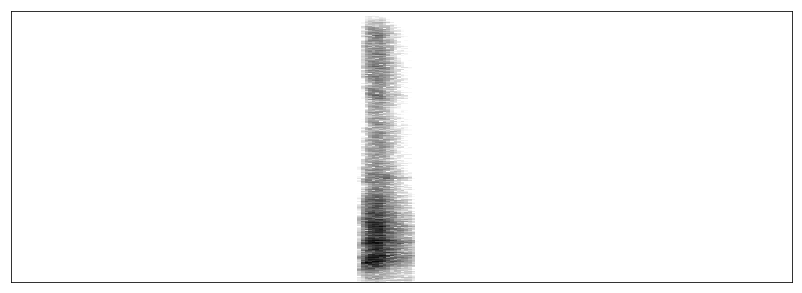

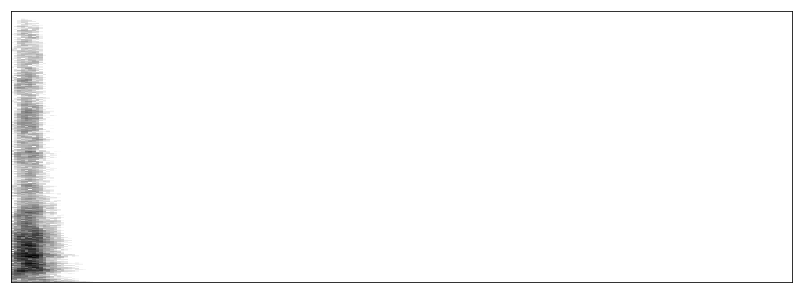

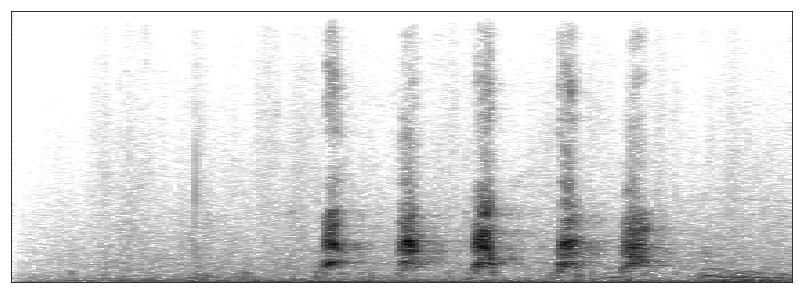

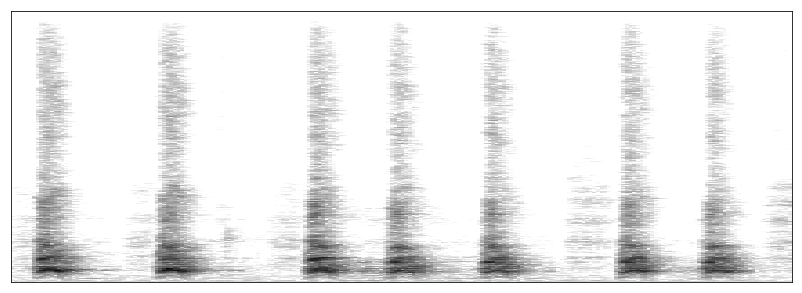

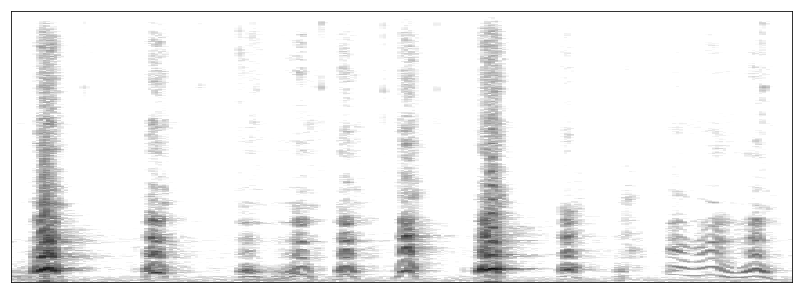

In [37]:
import time
for i, dog in enumerate(dogs.values[:5]):
    dog_wav_path = "ESC-50-master/audio/" + dogs.values[i][0]
    print(dog_wav_path)
    ipd.display(ipd.Audio(url=dog_wav_path))
    audio, sr = librosa.load(dog_wav_path)
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    ipd.display(librosa.display.specshow(Xdb, sr=sr, cmap='gray_r'))


ESC-50-master/audio/5-9032-A-0.wav


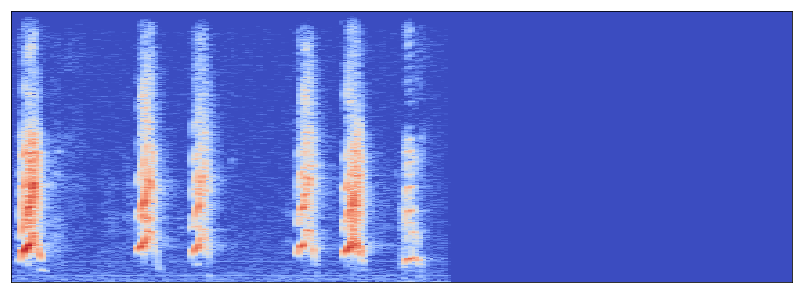

In [30]:
dog_wav_path = 'ESC-50-master/audio/5-9032-A-0.wav'
print(dog_wav_path)
ipd.display(ipd.Audio(url=dog_wav_path))
audio, sr = librosa.load(dog_wav_path)
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
ipd.display(librosa.display.specshow(Xdb, sr=sr))

44100
[-13  -4 -15 ...   0   0   0]


ValueError: x and y must have same first dimension, but have shapes (44100,) and (220500,)

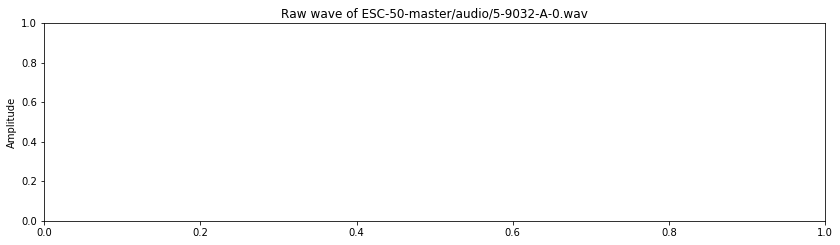

In [31]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

filename = 'ESC-50-master/audio/5-9032-A-0.wav'
sample_rate, samples = wavfile.read(filename)
print(sample_rate)
print(samples)

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

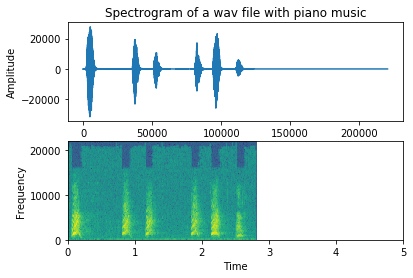

In [16]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('ESC-50-master/audio/5-9032-A-0.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with piano music')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 
plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')


 

plot.show()

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [33]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("ESC-50-master/audio/5-9032-A-0.wav")

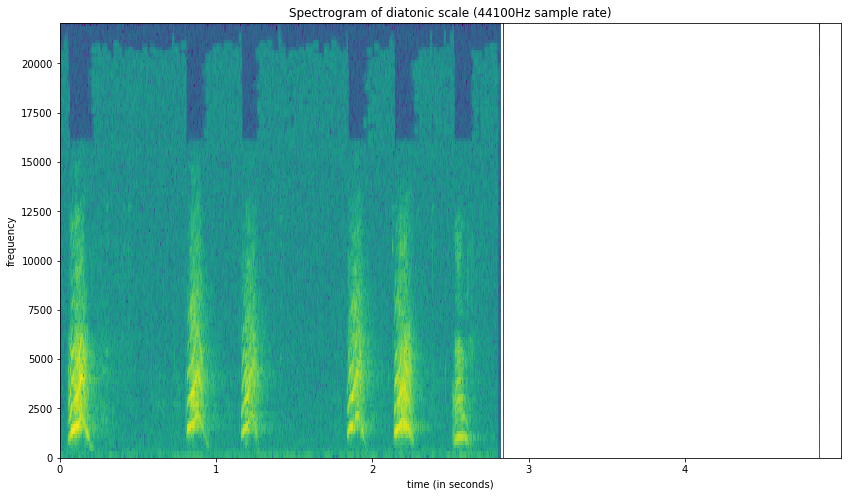

In [36]:
np.seterr(divide = 'ignore') 
setup_graph(title='Spectrogram of diatonic scale (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=doremi_sample_rate)